# Import Dependencies

In [63]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.naive_bayes import MultinomialNB
import joblib

# Import Data

In [2]:
df = pd.read_csv("indonesian-names.csv")
df

,name,gender
0,hafizhan shidqi,m
1,gandhi wibowo,m
2,aldio mahendra purwandrarto,m
3,benny putra,m
4,vicky vernando dasta,m
...,...,...
1955,hadimah,f
1956,aprillia rahma wati,f
1957,muhamad khoirunisa. m,m
1958,sukandi,m


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1960 entries, 0 to 1959
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   name    1960 non-null   object
 1   gender  1960 non-null   object
dtypes: object(2)
memory usage: 30.8+ KB


In [4]:
df.describe()

,name,gender
count,1960,1960
unique,1795,2
top,sumarno,m
freq,6,1094


# Data Cleaning

In [6]:
df = df.drop_duplicates(subset = "name")

In [7]:
df.describe()

,name,gender
count,1795,1795
unique,1795,2
top,hafizhan shidqi,m
freq,1,1002


In [36]:
df_freq = df.groupby('gender').count()
df_freq = df_freq.reset_index()
df_freq = df_freq.rename(columns = {'name' : 'freq'})
df_freq

,gender,freq
0,f,793
1,m,1002


<Axes: xlabel='gender', ylabel='freq'>

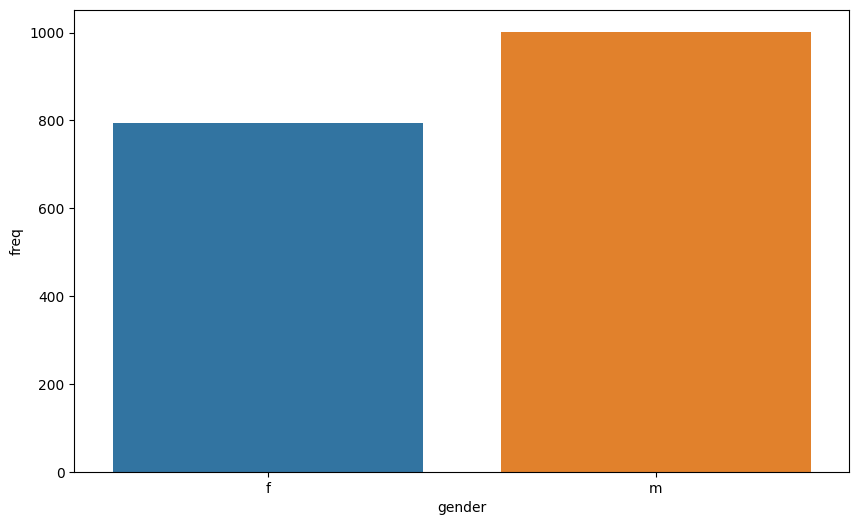

In [37]:
plt.figure(figsize=(10,6))
sns.barplot(x= 'gender', y= 'freq', data= df_freq)

# Data Preprocessing

In [41]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(df['name'])

In [64]:
# Save the TfidfVectorizer model
joblib.dump(tfidf_vectorizer, 'tfidf_vectorizer_model.pkl')

['tfidf_vectorizer_model.pkl']

In [50]:
# Define features
name_vectorized = tfidf_matrix.toarray()

In [48]:
# Define labels
label_encoder = LabelEncoder()
label_encoded = label_encoder.fit_transform(df['gender'])

# Data Splitting

In [53]:
X_train, X_test, y_train, y_test = train_test_split(name_vectorized, label_encoded, test_size=0.2, random_state=42)

# Hyperparameter Tuning

## Model Training (Logistic Regression, Random Forest, SVM)

In [55]:
# Define classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC()
}

# Hyperparameter tuning using GridSearchCV
for name, classifier in classifiers.items():
    parameters = {}

    if isinstance(classifier, LogisticRegression):
        parameters = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust hyperparameters as needed
        }
    elif isinstance(classifier, SVC):
        parameters = {
            'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Adjust hyperparameters as needed
            'gamma': [0.001, 0.01, 0.1, 1, 10, 100]  # For SVM, adjust as needed
        }

    grid_search = GridSearchCV(classifier, parameters, cv=10)
    grid_search.fit(X_train, y_train)

    # Print best hyperparameters
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy}\n")

Best hyperparameters for Logistic Regression: {'C': 10}
Accuracy for Logistic Regression: 0.7409470752089137

Best hyperparameters for Random Forest: {}
Accuracy for Random Forest: 0.6880222841225627

Best hyperparameters for SVM: {'C': 100, 'gamma': 0.01}
Accuracy for SVM: 0.7465181058495822



## Model Training (Naive Bayes)

In [58]:
# Define classifiers
classifiers = {
    'Naive Bayes': MultinomialNB()
}

# Hyperparameter tuning using GridSearchCV
for name, classifier in classifiers.items():
    parameters = {
            'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
            'fit_prior': [True, False]
            }

    grid_search = GridSearchCV(classifier, parameters, cv=10)
    grid_search.fit(X_train, y_train)

    # Print best hyperparameters
    print(f"Best hyperparameters for {name}: {grid_search.best_params_}")

    # Make predictions on the test set
    y_pred = grid_search.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    print(f"Accuracy for {name}: {accuracy}\n")

Best hyperparameters for Naive Bayes: {'alpha': 1, 'fit_prior': True}
Accuracy for Naive Bayes: 0.7604456824512534



# Model Training (Best Model)

In [61]:
model = MultinomialNB(alpha=1, fit_prior=True)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Final accuracy: {accuracy}\n")

Final accuracy: 0.7604456824512534



In [69]:
# Save the MultinomialNB model
joblib.dump(model, 'predictor_model.pkl')

['predictor_model.pkl']

# Predictor

In [73]:
def predict_gender(name):
  name_vectorized = tfidf_vectorizer.transform(name)
  pred = model.predict(name_vectorized)
  pred_original = label_encoder.inverse_transform(pred)
  return pred_original

In [90]:
names = [
    "Maryamah Supeni",
    "Sutejo",
    "Anugrah Desriana Cahya Dewi",
    "Linggar Maretva Cendani",
    "Julia Asyifa Farahdani"
]

labels = [
    "f",
    "m",
    "f",
    "m",
    "f"
]

for i, (pred, label) in enumerate(zip(predict_gender(names), labels)):
  print("Name: ", names[i])
  print("Prediction: ", pred)
  print("Label: ", label)
  if pred == label:
    print(True)
  else:
    print(False)
  print("\n")

Name:  Maryamah Supeni
Prediction:  m
Label:  f
False


Name:  Sutejo
Prediction:  m
Label:  m
True


Name:  Anugrah Desriana Cahya Dewi
Prediction:  f
Label:  f
True


Name:  Linggar Maretva Cendani
Prediction:  m
Label:  m
True


Name:  Julia Asyifa Farahdani
Prediction:  f
Label:  f
True


